In [1]:
pwd

'/home/siddhant/notebook files'

In [2]:
cd /home/siddhant/Desktop/data_sets/iris-species (1)

/home/siddhant/Desktop/data_sets/iris-species (1)


## importing all important modules that we will use.

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## loading the training data

In [4]:
train=pd.read_csv('Iris.csv')

In [5]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## information about the dataset 

this method will give the information about the columns of the dataset,column name,their datatype ,how many values it have.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [7]:
train.shape

(150, 6)

## check whether the dataset has null values

In [8]:
train.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## check the unique values of the species column

 check the different types of values(or entries) in any column by the unique() method.
 
 here we are checking the types of values in the species column that is our target.

In [9]:
train.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## changing the categorical values in the datasest into numerical  values using labelencoder

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
train.Species=label_encoder.fit_transform(train.Species)

the categorical-values are converted into numerical-values.

check the values using unique() method.

In [12]:
train.Species.unique()

array([0, 1, 2])

#### check the head of the again to see the numeric values in all the columns

In [13]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


train_test_split will split the data in two parts training data and testing data.

train data will contain the dataset with the target variable that we will use to train the model .

test data will be a dataset that will contain only the features that we will use to predict the target to check the accuracy of our model.

In [14]:
from sklearn.model_selection import train_test_split

storing the target variable in a separate variable y.

In [15]:
y=train['Species']
y.unique()

array([0, 1, 2])

as the id column in the datset is just for reference(ie for denoting the set of values of the features for a particular flower) and has no impact on the target variable

we will drop the column from the dataset.

In [16]:
train=train.drop(['Id'],axis=1)

dropping the species column to split the dataset into four parts (X_train, X_test, y_train, y_test)

X_train and y_train for training the model and X_test and y_test for testing the model.

In [17]:
X=train.drop(['Species'],axis=1)

splitting of data into four parts.

test_size denotes the share of data used for testing that is allocated to X_test and y_test.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# importing logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000)

## training the model by calling the fit method

In [20]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

after the model is trained now and ready to make preiction we can check the accuracy by testing it with the test data.


In [21]:
model.score(X_test,y_test)

0.9666666666666667

as we can see above teh score of our model on the test data is 1.00 ie 100%(which will change if we run the train test split again as the splitting is at random)

Anyway it's good!!

check the model by giving a set of values by your own.(always enter the values in the form of a list)

In [22]:
category=['iris-setosa','iris-versicolor','iris-virginica']

In [23]:
pred=model.predict([[5.2,3.2,1.4,0.3]])
pred

array([0])

more specifically we can write it as 

In [24]:
category[int(pred)]

'iris-setosa'

this was a very basic model using logistic regression to predict the type of flower with its features.

we achieved a good accuracy without any changes.

In [25]:
from sklearn.utils import shuffle

In [26]:
#train=shuffle(train)

lets do some visualisation on the dataset to gain some knowledge about the behaviour of the features with its values.

importing seaborn and matplotib for visualisation.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

### all the 3 target variables are present in equal amount in the dataset.

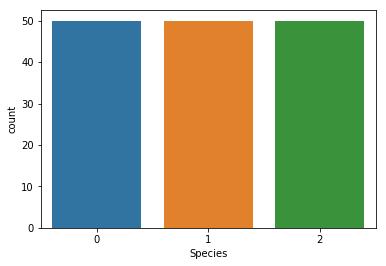

In [28]:
sns.countplot(train['Species'])

plotting a scatter plot for every feature with the target variable will give an idea about the variance we have in the dataset.

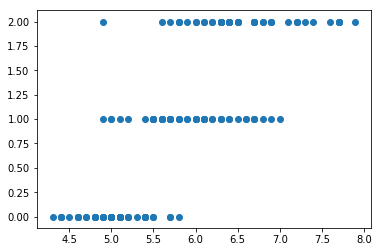

In [29]:
plt.scatter(train['SepalLengthCm'],train['Species'])

this scatter plot tells us about the relation between sepal length and the species it belongs to.

as we can see in each category of the species the points are near each other(almost) except some of them which 
are far from the rest.these are the reasons why we cant achieve 100% accuracy  from our models.
these values that are different from the rest can be removed to make the model better as they will remove the exceptions 
and will follow the common trend ,but as we have very less data and the model will be getting these kind of values in 
future also for prediction we cant just simply ignore them.

check the data that is separated from other.


In [30]:
train.loc[(train.SepalLengthCm<5) & (train.Species==2)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,4.9,2.5,4.5,1.7,2


okay lets remove the data and see what happens!!

In [31]:
train.drop(106,inplace=True)

## doing the same thing with all the features in the dataset.

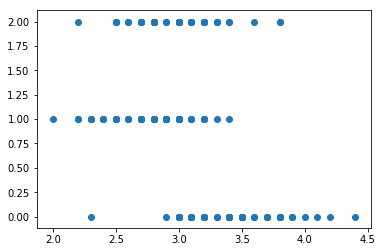

In [32]:
plt.scatter(train['SepalWidthCm'],train['Species'])

In [33]:
train.loc[(train.SepalWidthCm<2.3) & (train.Species==2)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
119,6.0,2.2,5.0,1.5,2


In [34]:
train.loc[(train.SepalWidthCm<2.5) & (train.Species==0)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,4.5,2.3,1.3,0.3,0


In [35]:
train.drop(119,inplace=True)
train.drop(41,inplace=True)

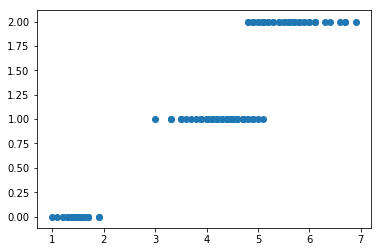

In [36]:
plt.scatter(train['PetalLengthCm'],train['Species'])

In [37]:
train.loc[(train.PetalLengthCm<3.2) & (train.Species==1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
98,5.1,2.5,3.0,1.1,1


In [38]:
train.drop(98,inplace=True)

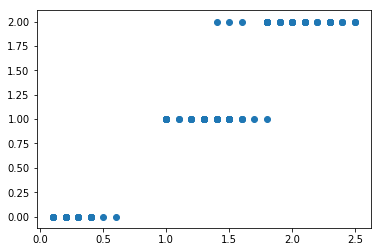

In [39]:
plt.scatter(train['PetalWidthCm'],train['Species'])

## as we have removed some of the data from our dataset .lets plot the scatter plot again.


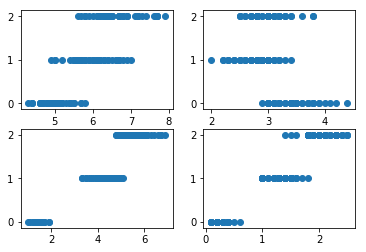

In [40]:
plt.subplot(2, 2, 1)
plt.scatter(train['SepalLengthCm'],train['Species'])
plt.subplot(2, 2, 2)
plt.scatter(train['SepalWidthCm'],train['Species'])
plt.subplot(2, 2, 3)
plt.scatter(train['PetalLengthCm'],train['Species'])
plt.subplot(2, 2, 4)
plt.scatter(train['PetalWidthCm'],train['Species'])

as we have dropped some of the rows from the dataset, lets check the info about the dataset.

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    146 non-null float64
SepalWidthCm     146 non-null float64
PetalLengthCm    146 non-null float64
PetalWidthCm     146 non-null float64
Species          146 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.8 KB


as we dropped 4 rows from the dataset now we have 146 rows in each feature ,previously we had 150.

In [42]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Repeating the same procedure of removing the target variable and splitting the dataset into train and test set to check the model.

In [43]:
y=train['Species']
y.unique()

array([0, 1, 2])

In [44]:
X=train.drop(['Species'],axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [46]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
model.score(X_test,y_test)

0.9333333333333333

# the score of the model will vary with the dataset as it is splits randomly.